In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from muvi import geometry as mge
# # vorpy can take up to 20 seconds to import
# # without the DifferentialEquations module,
# # with it, it can take up to 2:15 minutes.
# # When it is precompiling the Julia modules
# # it can take up to 4:30 minutes (and does
# # not give any output)!
from vorpy import bs_solve
# from juliacall import Main as jl

import python_src.vortex_generators as vg

  Activating project at `~/Dropbox/code/vorpy`


Max number of thread: 640
Register usage: 96
Memory usage: (local = 280, shared = 0, constant = 0)


In [2]:
# # Activate Julia environment in the
# # current working directory (which should be vorpy)
# jl.Pkg.activate('.')

In [3]:
# Load CPU vortex dynamics
# jl.include('julia_src/vortex_path_dynamics_kernel_cpu.jl')

# I don't know what's being done (by JuliaCall)
# when this cell is trying to include the vortex
# dynamics kernel, but I let it run for +10 minutes
# and it did not finish (I think it was precompiling
# the DifferentialEquations Julia module).

In [4]:
# def vortex_evolve(vpps, vcrds, vcirs, t_span, dt_min, dt_max, loc_err, dt=np.inf):
#     # print('np.shape(vpps):', np.shape(vpps))  # DEBUG
#     vppsT = np.transpose(vpps)
#     # print('np.shape(vppsT):', np.shape(vppsT))  # DEBUG
#     # vortex_dynamics_DifferentialEquations(vpps_init, vcrds, vcirs, timespan, loc_err_tol; report_interval=nothing)
#     vorevolfn = jl.vortex_dynamics_DifferentialEquations
#     vpps_vec, vel_vec, tvec, errvec = vorevolfn(
#                                                 jl.convert(jl.Array, vppsT),
#                                                 vcrds,
#                                                 vcirs,
#                                                 t_span,
#                                                 dt_min,
#                                                 dt_max,
#                                                 loc_err,
#                                                 report_step_size=dt)
    
#     return np.transpose(vpps_vec), np.transpose(vel_vec), np.array(tvec), np.array(errvec)

In [5]:
# Set the output directory where the point
# sequences will be saved
odir = 'vrtx_ring_results/point_sequences'
if not os.path.exists(odir):
    os.makedirs(odir)

In [6]:
# Vortex paramters
NUMSEGS = 100
VCENTER = (0, 0, 0)
VRADIUS = 1
CORERADIUS = 1e-3
print('Number of segments:', NUMSEGS)
print('Ring center:', VCENTER)
print('Ring radius:', VRADIUS)
print('Core radius:', CORERADIUS)


# Generate the vortex path points
# vpps = vg.vortex_ring(NUMSEGS, RINGCENTER, RINGRADIUS)
vpps = vg.three_fold_loop(NUMSEGS, VCENTER, VRADIUS)

# Generate the core radii
vcrds = np.ones(NUMSEGS+1) * CORERADIUS

# Generate the circulation
vcirs = np.ones(NUMSEGS+1) * 1.0

Number of segments: 100
Ring center: (0, 0, 0)
Ring radius: 1
Core radius: 0.001


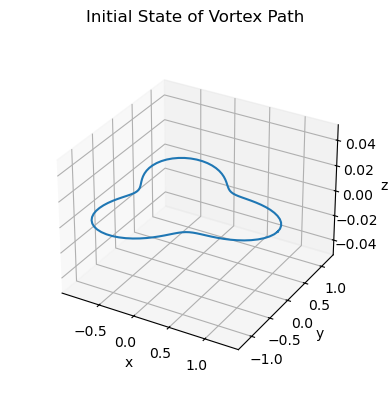

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.plot(vpps[:,0], vpps[:,1], vpps[:,2])
plt.title('Initial State of Vortex Path')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect(aspect=None, zoom=0.85)  # need this cause z-axis label was cut off

plt.show()

In [34]:
TSPAN = (0, 5)
# MINSTEP = 1e-6
# MAXSTEP = 1e3
# LOCERR = 1e-2
print('Time span:', TSPAN)
# print('Minimum step:', MINSTEP)
# print('Maximum step:', MAXSTEP)
# print('Local error tolerance:', LOCERR)

# SOL, VELVEC, TVEC, ERRVEC = vortex_evolve(vpps, vcrds, vcirs, TSPAN, MINSTEP, MAXSTEP, LOCERR, dt=None)

Time span: (0, 5)


In [35]:
# Load the SciPy module for solving ODEs
import scipy.integrate as spi

def bsfn(t, vpos):
    vpps = np.reshape(vpos, (-1, 3))
    # print('vpps shape:', np.shape(vpps))  # DEBUG
    print('t:', t)  # DEBUG
    return bs_solve(vpps, vpps, vcrds, vcirs, device='cpu').flatten()

In [36]:
np.shape(bsfn(0, vpps.flatten()))

t: 0


(303,)

In [37]:
sol = spi.solve_ivp(bsfn, TSPAN, vpps.flatten(), t_eval=np.linspace(TSPAN[0], TSPAN[1], 10)[1:-1])

# def vortex_dynamics_scipy(vpps_init, vcrds, vcircs, timespan, loc_err_tol, report_interval=None):


t: 0.0
t: 4.366694548689598e-05
t: 0.0008733389097379196
t: 0.0013100083646068793
t: 0.0034933556389516785
t: 0.0038815062655018647
t: 0.004366694548689598
t: 0.004366694548689598
t: 0.006845830003172916
t: 0.008085397730414575
t: 0.01428323636662287
t: 0.015385074346393234
t: 0.016762371821106188
t: 0.016762371821106188
t: 0.023464680651679892
t: 0.02681583506696674
t: 0.043571607143401
t: 0.04655041106810042
t: 0.0502739159739747
t: 0.0502739159739747
t: 0.062498381353835425
t: 0.06861061404376578
t: 0.0991717774934176
t: 0.10460487321780013
t: 0.11139624287327832
t: 0.11139624287327832
t: 0.12247526269396773
t: 0.12801477260431243
t: 0.15571232215603598
t: 0.16063633096523128
t: 0.1667913419767254
t: 0.1667913419767254
t: 0.1178267075827253
t: 0.12104193993744879
t: 0.13711810171106625
t: 0.139976086026376
t: 0.14354856642051322
t: 0.14354856642051322
t: 0.14954639966119926
t: 0.15254531628154228
t: 0.16753989938325736
t: 0.1702056030457845
t: 0.1735377326239434
t: 0.173537732623943

In [43]:
print(np.shape(sol.t))
soly = sol.y.reshape((8, -1, 3))


(8,)


In [ ]:
# Plot the evolution of the vortex ring

fig = plt.figure()
fig.add_subplot(projection='3d')
for i in range(soly.shape[0]):
    print(i)
    plt.plot(soly[i, :, 0], soly[i, :, 1], soly[i, :, 2], label=sol.t[i])
    # plt.quiver(soly[i, :, 0], soly[i, :, 1], soly[i, :, 2], VELVEC[i, :, 0], VELVEC[i, :, 1], VELVEC[i, :, 2])  #, length=0.1, normalize=True)
plt.legend()
plt.show()

In [ ]:
# VELVEC.shape

In [44]:
# Make a "sequence"

# We will use a dictionary to store a sequence
# of Points objects, indexed numerically, where
# each number is a specific frame or time step
seq = {}
for i in range(soly.shape[0]):
    seq[i] = mge.Points(soly[i], core=vcrds, circ=vcirs)
    # seq[i] = mge.Points(SOL[i], vel=VELVEC[i], core=vcrds, circ=vcirs)

# Create a "PointSequence" object
ps = mge.PointSequence(seq, display={})
ps.save(odir + '/tree_fold_loop_sequence.vtp')